# Run this before starting 



In [1]:
!python --version
!pip install pandas
!!pip install pandasql


/bin/bash: line 1: python: command not found
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 613.0 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 1.2 MB/s eta 0:00:00m eta 0:00:010:00:01m


['Defaulting to user installation because normal site-packages is not writeable',
 'Collecting pandasql',
 '  Downloading pandasql-0.7.3.tar.gz (26 kB)',
 '  Preparing metadata (setup.py): started',
 "  Preparing metadata (setup.py): finished with status 'done'",
 'Requirement already satisfied: numpy in /home/jerly/.local/lib/python3.10/site-packages (from pandasql) (1.24.1)',
 'Requirement already satisfied: pandas in /home/jerly/.local/lib/python3.10/site-packages (from pandasql) (1.5.2)',
 'Collecting sqlalchemy',
 '  Downloading SQLAlchemy-1.4.45-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.6 MB)',
 '     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 1.1 MB/s eta 0:00:00',
 'Requirement already satisfied: pytz>=2020.1 in /usr/lib/python3/dist-packages (from pandas->pandasql) (2022.1)',
 'Requirement already satisfied: python-dateutil>=2.8.1 in /home/jerly/.local/lib/python3.10/site-packages (from pandas->pandasql) (2.8.

# Problem A - Password generator

Write a password generator CLI. Be creative with how you generate passwords - strong passwords have a mix of lowercase letters, uppercase letters, numbers, and symbols. The passwords should be random, generating a new password every time the user asks for a new password. Include your run-time code in a main method.

Extra:
* Ask the user how strong they want their password to be. For weak passwords, 
pick a word or two from a list.


## Solution:

In [ ]:
import random
import string


def generate_password():
    print("Welcome to the password generator CLI!\n")
    words = ["luffy", "data", "kvothe", "akira"]
    password = ""

    # Ask the user for password strength
    strength = input("Enter password strength (weak, medium, strong): ").lower()

    # Generate random password based on strength
    if strength == "weak":
        password = random.choice(words)

    # Generate a medium password (a mix of letters, numbers, and symbols of length 12)
    elif strength == "medium":
        password_length = 12
        password = "".join(random.choices(
            string.ascii_letters + string.digits + string.punctuation, k=password_length))

    # Generate a strong password (a mix of letters, numbers, and symbols of length 16)
    elif strength == "strong":
        password_length = 16
        password = "".join(random.choices(
            string.ascii_letters + string.digits + string.punctuation, k=password_length))

    # Generate a secure password (a mixture of letters and numbers of length 16)
    else:
        password_length = 16
        password = ''.join(random.choices(string.ascii_lowercase +
                           string.ascii_uppercase + string.digits, k=password_length))

    # Print the generated password
    print("\nYour new password is:", password)



password = generate_password()




Welcome to the password generator CLI!

Enter password strength (weak, medium, strong): strong

Your new password is: o-BtH8*Tmi)[@~?[


# Problem B - Maximum Edge of a Triangle
Create a function that finds the maximum range of a triangle's third edge, where the side lengths are all integers.

Examples:
* next_edge(8, 10) ➞ 17
* next_edge(5, 7) ➞ 11
* next_edge(9, 2) ➞ 10

Notes:
* (side1 + side2) - 1 = maximum range of third edge.
* The side lengths of the triangle are positive integers.


## Solution:

In [ ]:
def next_edge(side1, side2):
   
    # Check if a given value is a positive integer
    condition = isinstance(side1, int) and type(side1) == int and side1 > 0 and (
        isinstance(side2, int) and side2 > 0 and type(side1) == int)
    if condition:
        # Calculate the maximum range of the third edge using the formula (side1 + side2) - 1
        max_range = (side1 + side2) - 1

    else:
        max_range = "Both values must be positive integers"

    # Returns the maximum range or a message with the exception
    return max_range

print(next_edge(8, 10))  # Output: 17

17


### Test:

In [ ]:
print(next_edge(9, 2))  # Output: 11
print(next_edge(9, 2))  # Output: 10
print(next_edge(-9, 2))  # Output: exception
print(next_edge(-2, -2))  # Output: exception

10
10
Both values must be positive integers
Both values must be positive integers


# Problem C - Triangle Type

Write a SQL query identifying the type of each record in the **TRIANGLES** table using its three side lengths. Output one of the following statements for each record in the table:

* Equilateral: It's a triangle with sides of equal length.
* Isosceles: It's a triangle with 2 sides of equal length.
* Scalene: It's a triangle with sides of differing lengths.
* Not A Triangle: The given values of A, B, and C don't form a triangle.


**Input Format**

The **TRIANGLES** table is described as follows:

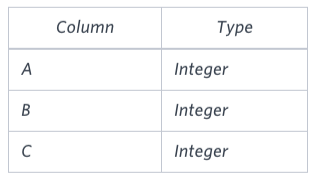


Each row in the table denotes the lengths of each of a triangle's three sides.

**Sample Input**

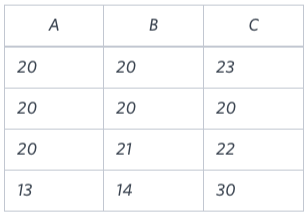

**Sample Output **

Isosceles
Equilateral
Scalene
Not A Triangle



**Explanation**
* Values in the tuple (20,20,23) form an Isosceles triangle, because A=B.
* Values in the tuple (20,20,20) form an Equilateral triangle, because A=B=C
* Values in the tuple (20,21,22) form a Scalene triangle because A <> B <> C
* Values in the tuple (13,14,30) cannot form a triangle because the combined * value of sides A and B is not larger than that of side C.



In [ ]:
# Import the pandas and pandasql libraries
import pandas as pd
from pandasql import sqldf

# Create a DataFrame with the data from the TRIANGLES table
triangles = [
    {'A': 20, 'B': 20, 'C': 23},
    {'A': 20, 'B': 20, 'C': 20},
    {'A': 20, 'B': 21, 'C': 22},
    {'A': 13, 'B': 14, 'C': 30}
]
df = pd.DataFrame(triangles)

# Write a SQL query that identifies the type of each triangle
query = """
SELECT
    CASE
        WHEN A = B AND B = C THEN 'Equilateral'
        WHEN A = B OR B = C OR A = C THEN 'Isosceles'
        WHEN (A + B > C) AND (A + C > B) AND (B + C > A) THEN 'Scalene'
        ELSE 'Not A Triangle'
    END AS 'triangle_type'
FROM df
"""

# Print the query results
print(sqldf(query, locals()))


    triangle_type
0       Isosceles
1     Equilateral
2         Scalene
3  Not A Triangle
